In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
%matplotlib inline

In [2]:
# I'm use only student-por.csv
data = pd.read_csv('../input/student-por.csv')

# Data Overview

In [3]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

# Some Visualizations

Let's do some basic data visualizations.

## Sex

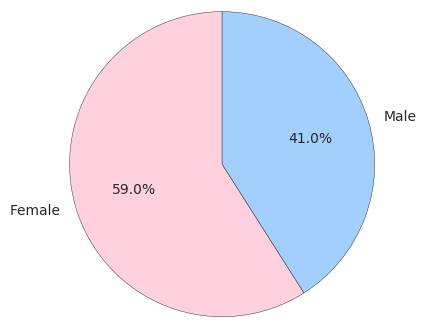

In [5]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

## Age

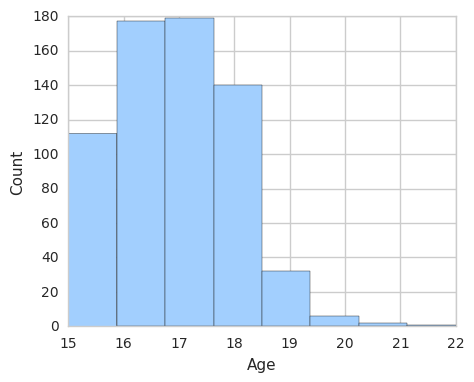

In [6]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(data['age'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Age")

## Weekly study time

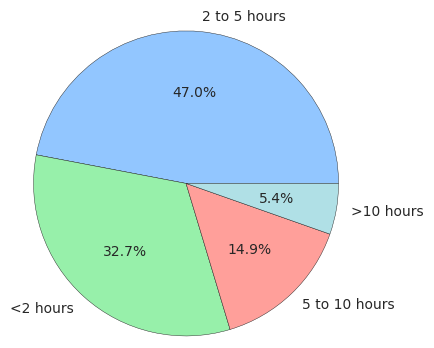

In [7]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')

## Romantic Relationship

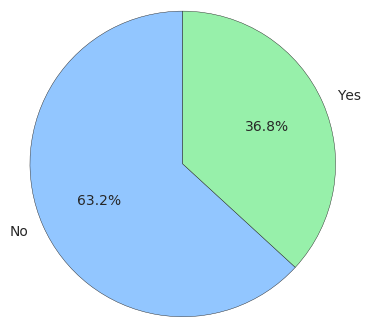

In [8]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['romantic'].value_counts().tolist(), 
        labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

## Alcohol Consumption and other features

Workday alcohol consumption: number from 1 (very low) to 5 (very high)<br/>
Weekend alcohol consumption: number from 1 (very low) to 5 (very high)<br/>
Health - current health status: number from 1 (very bad) to 5 (very good) 

### Weekend Alcohol Consumption Distribution

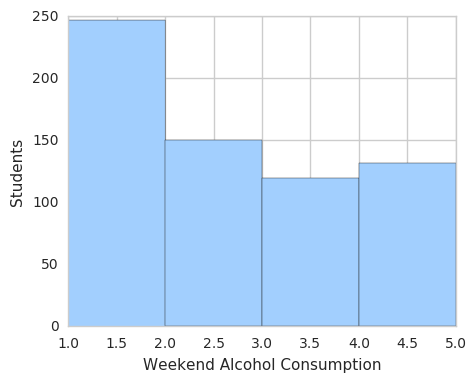

In [9]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(data['Walc'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=4)
ax = ax.set(ylabel="Students", xlabel="Weekend Alcohol Consumption")

### Alcohol Consumption and Health

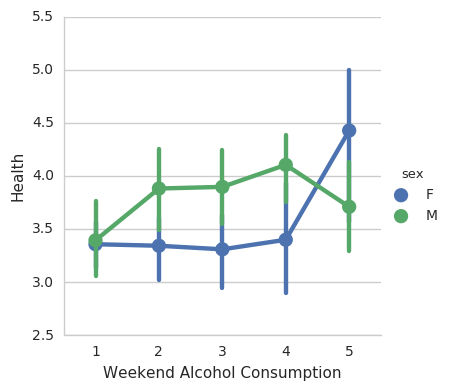

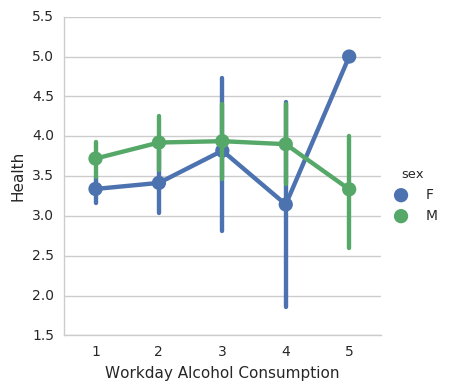

In [10]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=data)
plot1.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=data)
plot2.set(ylabel="Health", xlabel="Workday Alcohol Consumption")

### Alcohol Consumption and Final Grade

Final grade: number from 0 to 20.

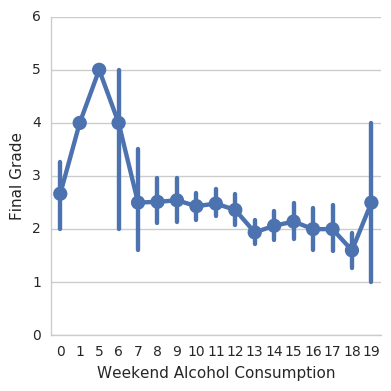

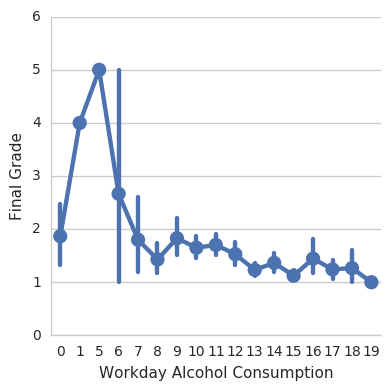

In [11]:
plot1 = sns.factorplot(x="G3", y="Walc", data=data)
plot1.set(ylabel="Final Grade", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="G3", y="Dalc", data=data)
plot2.set(ylabel="Final Grade", xlabel="Workday Alcohol Consumption")

# Final Grade Prediction

Output target of this dataset is **Final Grade**. Let's use some regression model to predict it. I'll limit myself to 4 simple regression models (without searching the best parameters): decision tree regression, linear regression, lasso and ridge regression.

## With G1 and G2 features

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score

In [13]:
y = data['G3']
X = data.drop(['G3'], axis=1)

In [14]:
X = pd.get_dummies(X)

In [15]:
names = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso']

clf_list = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso()]

In [16]:
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(cross_val_score(clf, X, y, cv=5).mean())

DecisionTreeRegressor: 0.611804040257
LinearRegression: 0.793947743393
Ridge: 0.794445933044
Lasso: 0.814282298478


It's a really good score. However, let's look at feature importances.

## Feature Importances

In [17]:
tree = DecisionTreeRegressor()
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [18]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature G2 (0.840524)
2. Feature famrel (0.026781)
3. Feature absences (0.021681)
4. Feature reason_other (0.016394)
5. Feature Dalc (0.013534)
6. Feature traveltime (0.009980)
7. Feature G1 (0.008519)
8. Feature age (0.008486)
9. Feature school_GP (0.007811)
10. Feature failures (0.005126)
11. Feature Walc (0.003551)
12. Feature guardian_father (0.003254)
13. Feature studytime (0.002712)
14. Feature health (0.002662)
15. Feature schoolsup_yes (0.002661)
16. Feature famsize_LE3 (0.002569)
17. Feature Fedu (0.002444)
18. Feature goout (0.002331)
19. Feature Medu (0.001877)
20. Feature Mjob_other (0.001703)
21. Feature freetime (0.001553)
22. Feature activities_yes (0.001079)
23. Feature romantic_yes (0.000887)
24. Feature reason_course (0.000853)
25. Feature Mjob_teacher (0.000824)
26. Feature nursery_no (0.000735)
27. Feature Mjob_services (0.000718)
28. Feature Fjob_health (0.000661)
29. Feature famsup_no (0.000571)
30. Feature Fjob_services (0.000529)
31. Feature schoolsup_no (0.0

Here's big problem. More than 80 percent of the predictive ability of the algorithm achieves with the help only of **G2** feature (second period grade). The remaining features are almost not use in this model. This means that almost all the data in no way help us to predict target feature.

Let's look at scores of models, trained without G1 and G2 features.

## Without G1 and G2 features

In [19]:
X = data.drop(['G3', 'G2', 'G1'], axis=1)

In [20]:
X = pd.get_dummies(X)

In [21]:
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(cross_val_score(clf, X, y, cv=5).mean())

DecisionTreeRegressor: -0.894292566071
LinearRegression: 0.163945011042
Ridge: 0.164772549486
Lasso: -0.126238725635


A terrible result. Unfortunately, using only survey questions (without grades for intermediate tests) we will not be able to predict the final grade.